In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.dates as mdates
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales = pd.read_csv("/content/drive/MyDrive/Task/Task1/train.csv")

In [4]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# check data distribution
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
# information about columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# replacing the spaces in the column names to underscore
sales.columns = sales.columns.str.replace(' ','_')

In [8]:
# converting the dates from string to date format
sales["Order_Date"] = pd.to_datetime(sales["Order_Date"], dayfirst = True).dt.date
sales["Ship_Date"] = pd.to_datetime(sales["Ship_Date"], dayfirst = True).dt.date

In [9]:
# creating a new column to show leadtime, which is the difference between the "ship_date" and "order_date"
sales["Leadtime"] = sales["Ship_Date"] - sales["Order_Date"]

In [10]:
sales["Month"] = pd.DatetimeIndex(sales["Order_Date"]).month
sales["Year"] = pd.DatetimeIndex(sales["Order_Date"]).year

In [11]:
# sum group by order_date
sales.groupby("Year")["Sales"].sum()

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Trend of Total sales per year')

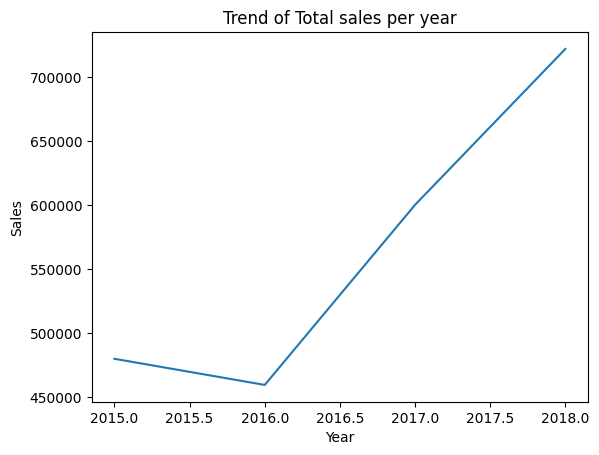

In [13]:
sales.groupby("Year")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Trend of Total sales per year")

In [14]:
# average sales group by month
sales.groupby("Month")["Sales"].mean()

Month
1     257.627403
2     199.902745
3     290.549393
4     207.432269
5     212.533412
6     211.052856
7     208.802997
8     227.007110
9     221.642106
10    246.596162
11    241.657496
12    232.619515
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Average Sales for each month')

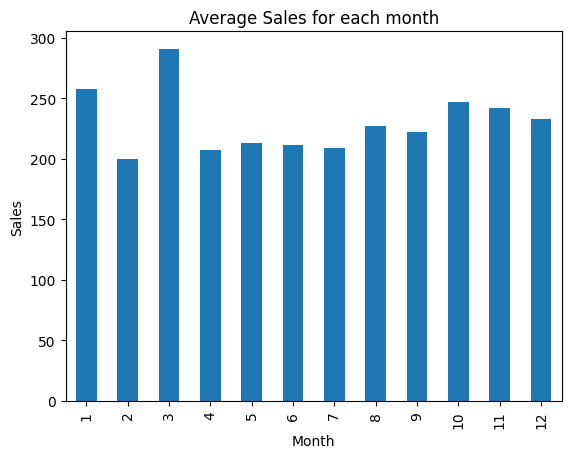

In [15]:
sales.groupby("Month")["Sales"].mean().plot.bar()
plt.ylabel("Sales")
plt.title("Average Sales for each month")

In [16]:
# average sales grouped by state
sales.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 10 States in terms of Sales')

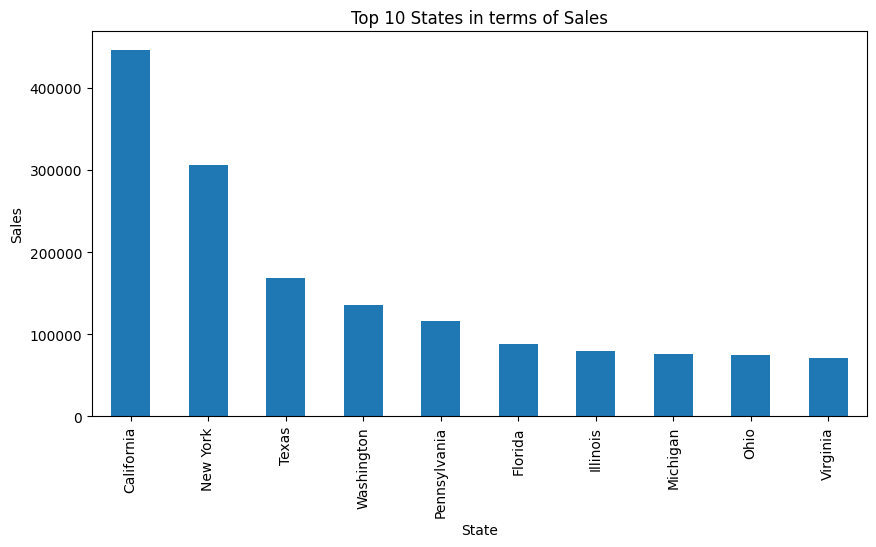

In [17]:
plt.figure(figsize=(10,5))
sales.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Sales")
plt.title("Top 10 States in terms of Sales")

In [18]:
# average sales grouped by City
sales.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 10 Cities in terms of Sales')

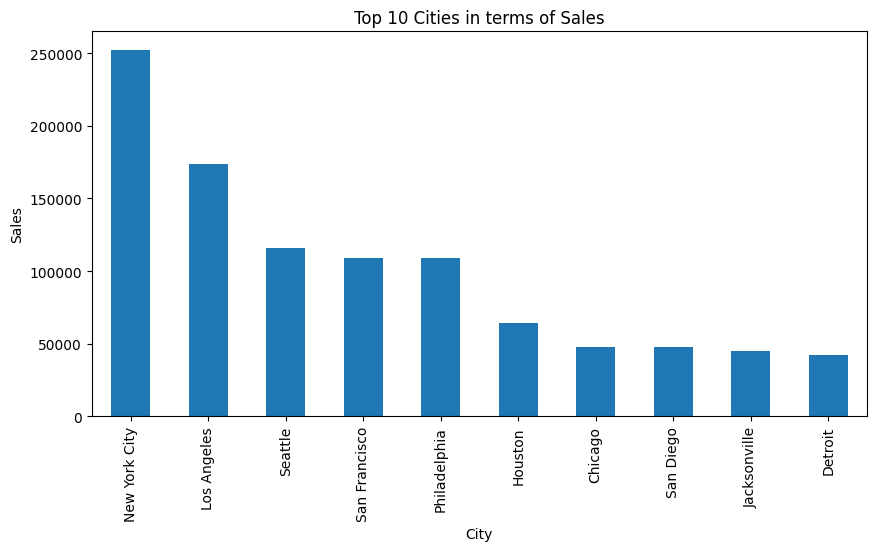

In [19]:
plt.figure(figsize=(10,5))
sales.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Sales")
plt.title("Top 10 Cities in terms of Sales")

In [25]:
sales.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Leadtime,Month,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days,11,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days,11,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days,6,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days,10,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days,10,2016


In [26]:
sales["Leadtime"].dt.days.describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Leadtime, dtype: float64

Text(0.5, 1.0, 'Leadtime histogram')

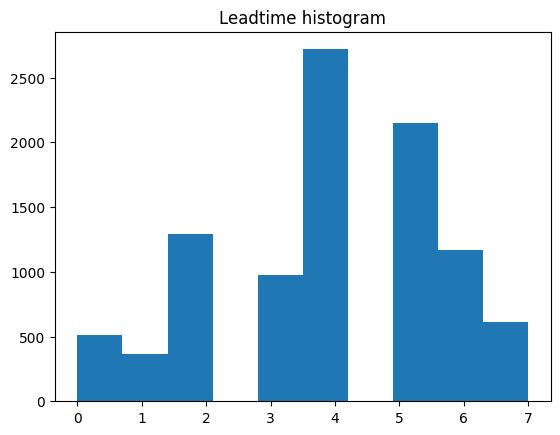

In [27]:
# plot histogram of Leadtime in days
plt.hist(sales["Leadtime"].dt.days)
plt.title("Leadtime histogram")

In [28]:
sales["Year_Month"] = sales["Year"].astype(str) + "-" + sales["Month"].astype(str)

In [29]:
sales["Year_Month"] = pd.to_datetime(sales["Year_Month"]).dt.date

In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row_ID         9800 non-null   int64          
 1   Order_ID       9800 non-null   object         
 2   Order_Date     9800 non-null   object         
 3   Ship_Date      9800 non-null   object         
 4   Ship_Mode      9800 non-null   object         
 5   Customer_ID    9800 non-null   object         
 6   Customer_Name  9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   Country        9800 non-null   object         
 9   City           9800 non-null   object         
 10  State          9800 non-null   object         
 11  Postal_Code    9789 non-null   float64        
 12  Region         9800 non-null   object         
 13  Product_ID     9800 non-null   object         
 14  Category       9800 non-null   object         
 15  Sub-

Text(0.5, 1.0, 'Sales Trend by Year-Month')

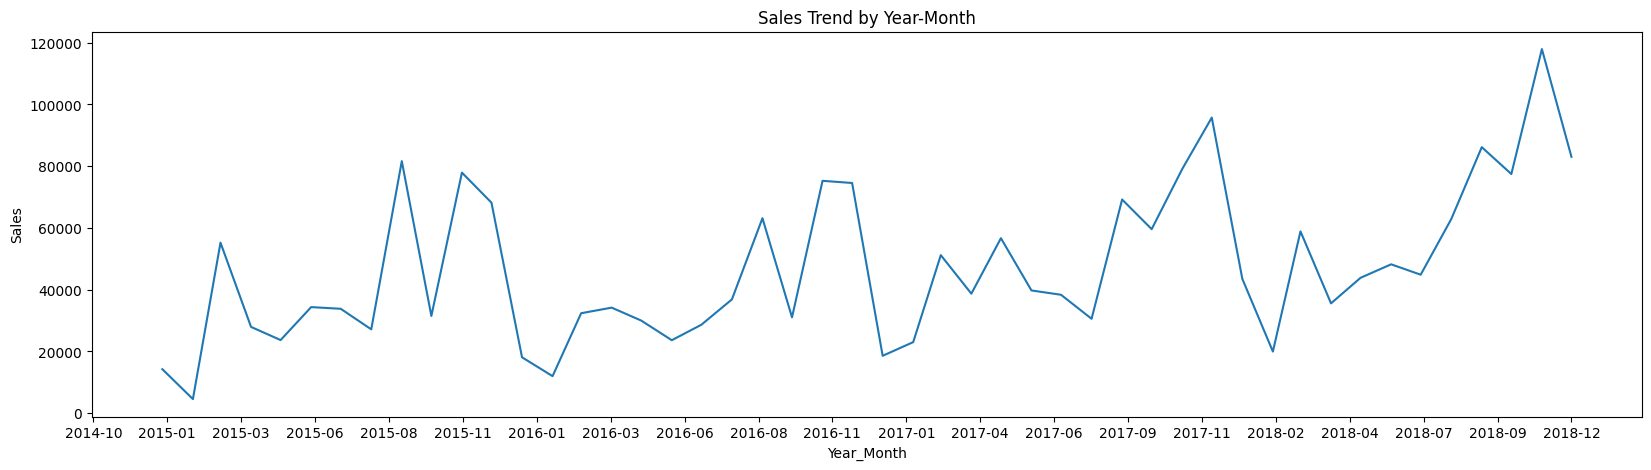

In [31]:
# sales trend using year_month
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
sales.groupby("Year_Month")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Sales Trend by Year-Month")

Text(0.5, 1.0, 'Sales Trends of each Category')

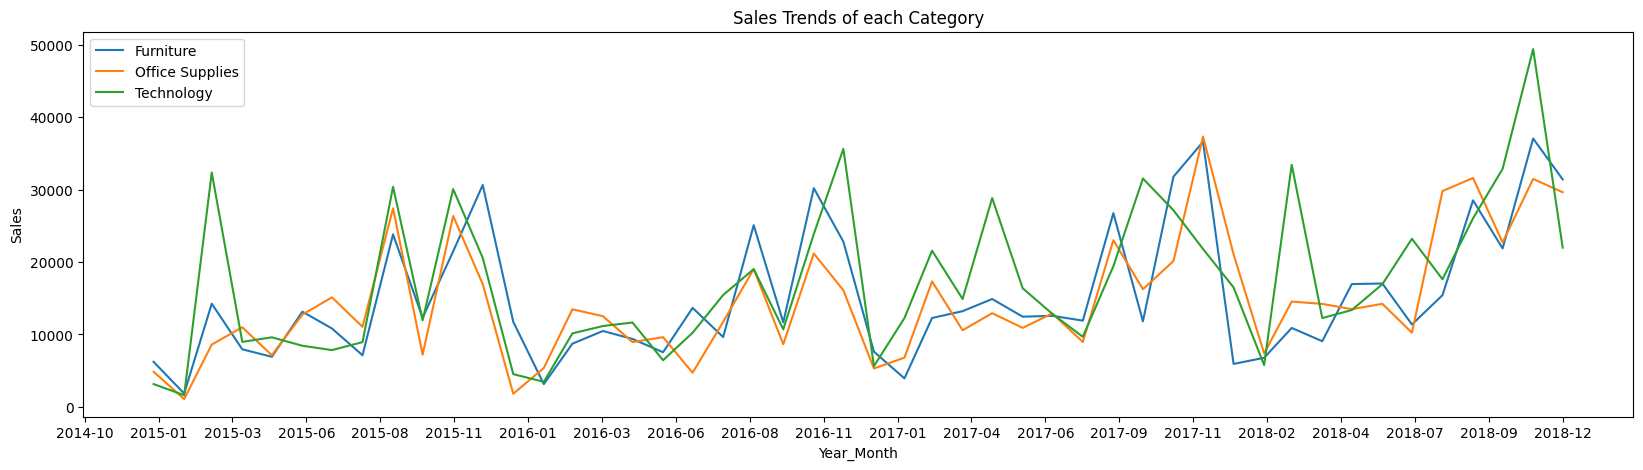

In [32]:
# sales trend using year_month
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
sales[sales.Category == "Furniture"].groupby("Year_Month")["Sales"].sum().plot(label="Furniture")
sales[sales.Category == "Office Supplies"].groupby("Year_Month")["Sales"].sum().plot(label="Office Supplies")
sales[sales.Category == "Technology"].groupby("Year_Month")["Sales"].sum().plot(label="Technology")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Trends of each Category")

In [33]:
sales_trend = sales[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_trend = sales_trend.sort_values(by="Year_Month")
sales_trend.head()

,Sales
Year_Month,
2015-01-01,14205.707
2015-02-01,4519.892
2015-03-01,55205.797
2015-04-01,27906.855
2015-05-01,23644.303


In [34]:
# compute for rolling average
sales_trend["rolmean"] = sales_trend.rolling(window=5).mean()
sales_trend.head()

,Sales,rolmean
Year_Month,,
2015-01-01,14205.707,NaN
2015-02-01,4519.892,NaN
2015-03-01,55205.797,NaN
2015-04-01,27906.855,NaN
2015-05-01,23644.303,25096.5108


Text(0.5, 1.0, 'Sales Trend by Year-Month with Rolling Average')

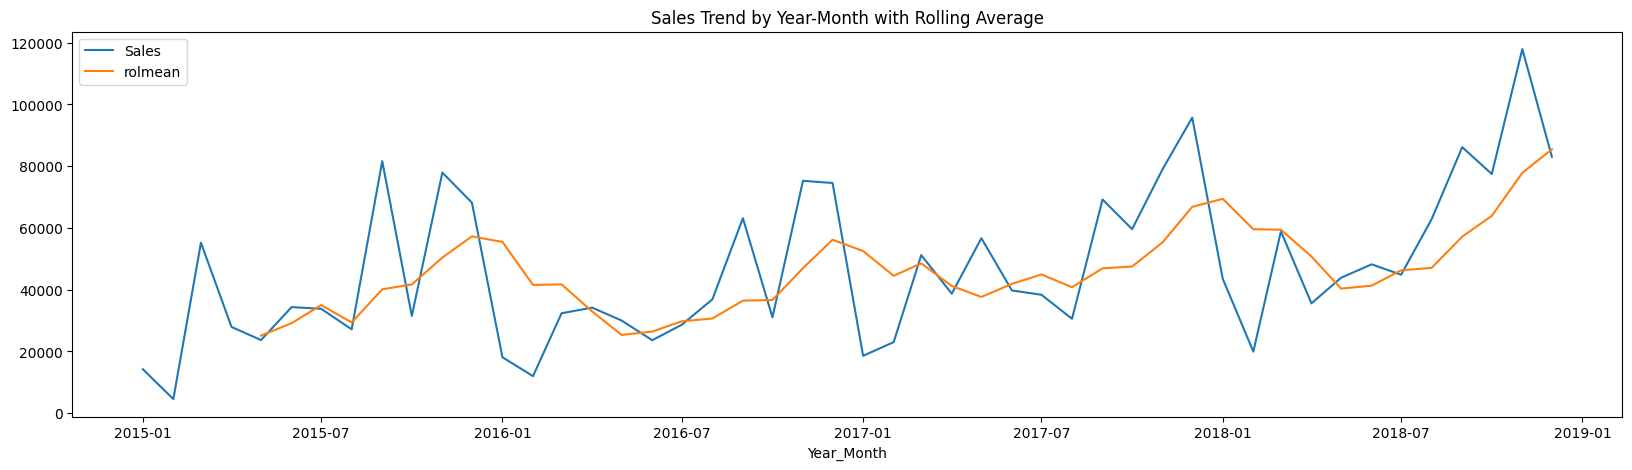

In [35]:
# sales trend using year_month with rolling average
sales_trend.plot(figsize=(20,5))
plt.legend()
plt.title("Sales Trend by Year-Month with Rolling Average")

In [36]:
# create a new dataframw where sales are aggregated monthly, then show date & monthly total sales only
sales_data = sales[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_data = sales_data.sort_values(by="Year_Month")
sales_data.head()

,Sales
Year_Month,
2015-01-01,14205.707
2015-02-01,4519.892
2015-03-01,55205.797
2015-04-01,27906.855
2015-05-01,23644.303


In [37]:
# use adfuller to check if sales trend is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.416137
p-value: 0.000278
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<Axes: xlabel='Year_Month'>

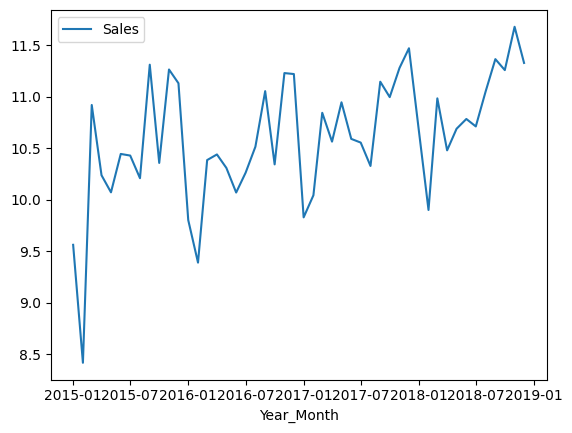

In [38]:
# get the log of the sales data
sales_data_log = np.log(sales_data)
sales_data_log.plot()

In [39]:
# check how stationary is the log'd data
result = adfuller(sales_data_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.857927
p-value: 0.000042
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<Axes: xlabel='Year_Month'>

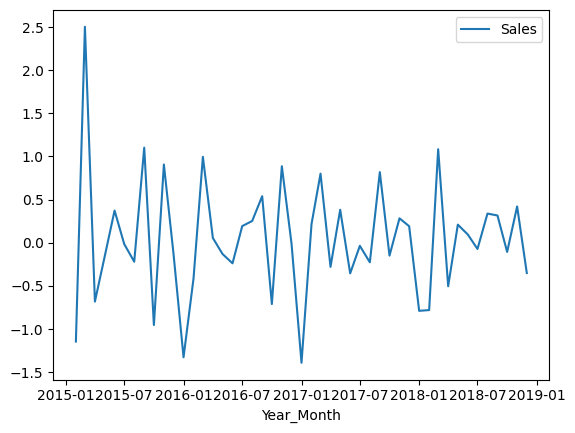

In [40]:
# create a new dataframe which is shifted by 1 month
sales_shift = sales_data_log - sales_data_log.shift()
sales_shift.plot()

In [41]:
# check how stationary the shifted data is
result = adfuller(sales_shift.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.023950
p-value: 0.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

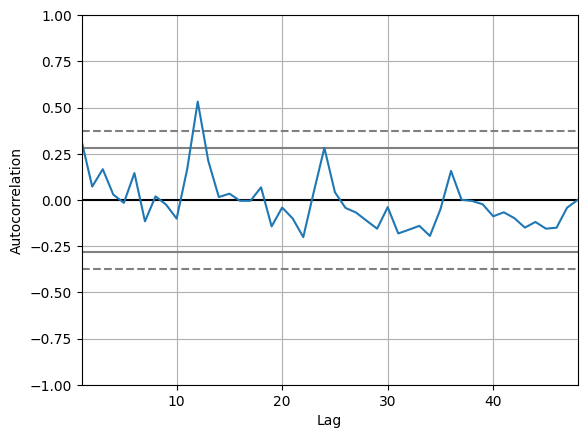

In [42]:
# autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data_log)

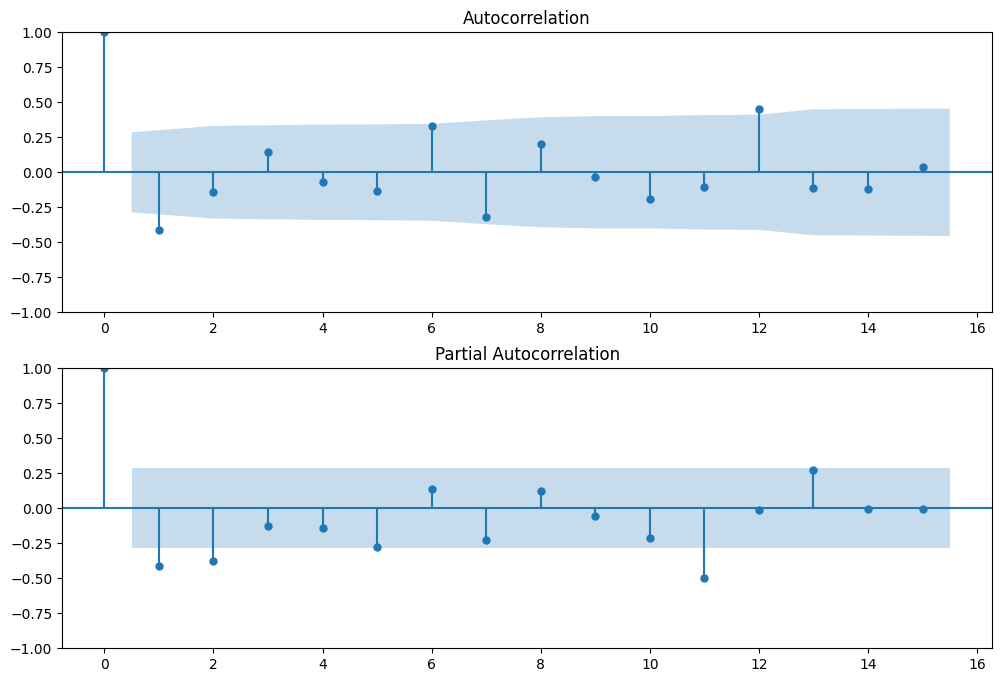

In [43]:
# check acf & pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_shift.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_shift.dropna(),lags=15,ax=ax2)

In [44]:
# use ARIMA for forecasting
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_shift,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.820
Date:                Wed, 06 Sep 2023   AIC                            115.640
Time:                        18:59:33   BIC                            121.190
Sample:                    01-01-2015   HQIC                           117.728
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4197      0.116     -3.630      0.000      -0.646      -0.193
ma.L1         -0.9995     16.344     -0.061      0.951     -33.032      31.033
sigma2         0.4078      6.628      0.062      0.951     -12.583      13.399
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.71   Prob(JB):                         0.14
Heteroskedasticity (H):               0.31   Skew:                             0.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Year_Month'>

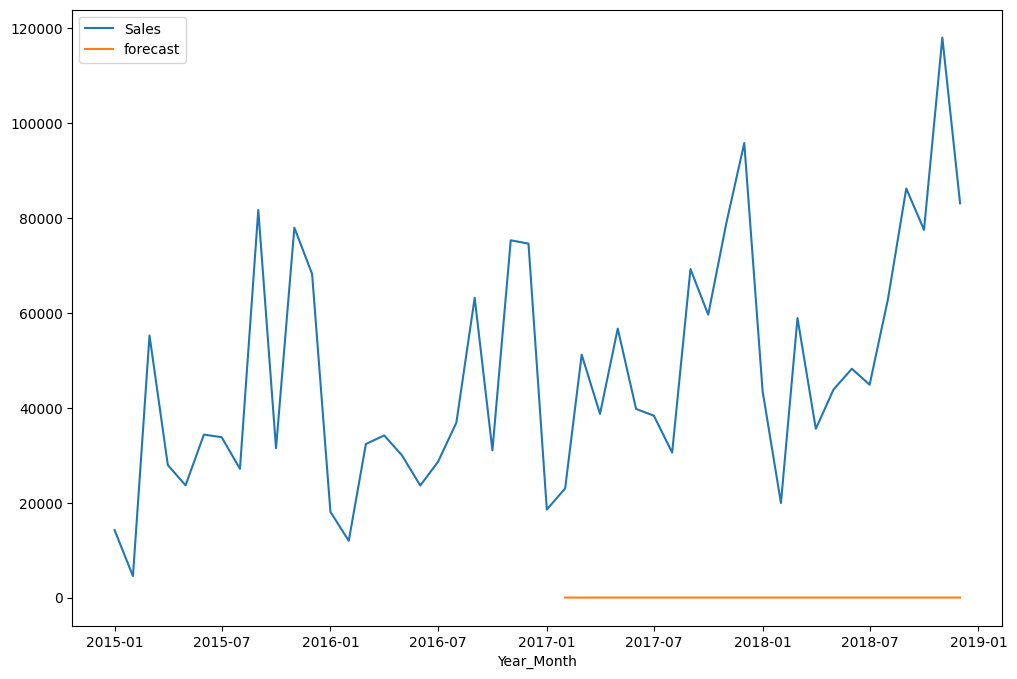

In [45]:
# plot forecast
sales_data['forecast']=model_fit.predict(start=25,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year_Month'>

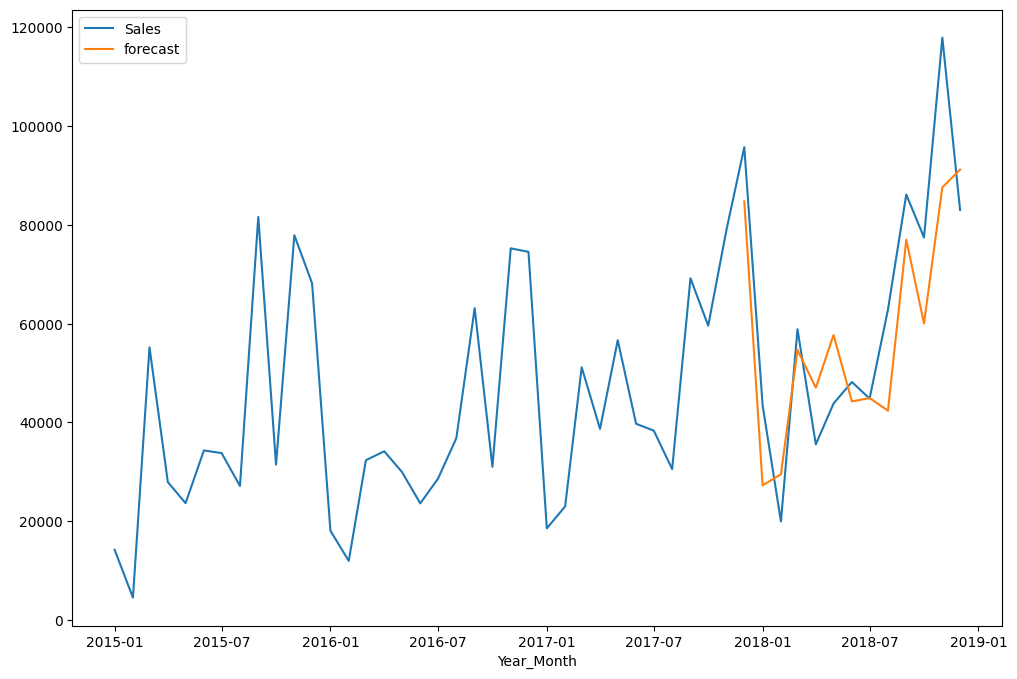

In [46]:
# use sarimax instead due to seasonality
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_data['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
sales_data['forecast']=results.predict(start=35,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

<ipython-input-48-0b376f2475da>:11: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  future_df[['Sales', 'forecast']].plot(figsize=(12, 8))


<Axes: >

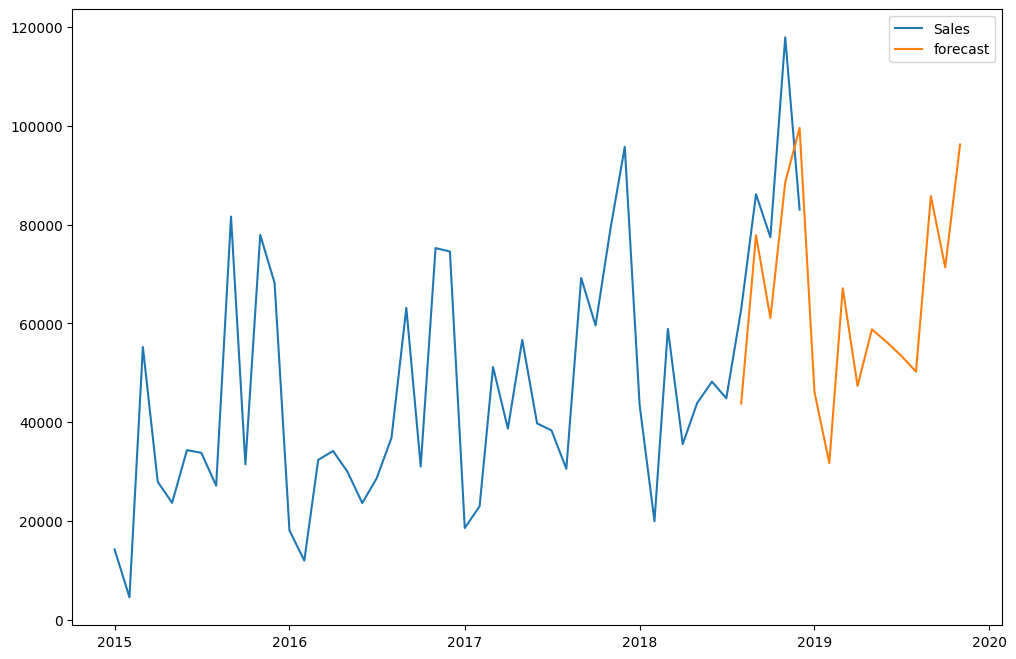

In [48]:
# extend forecast until 2022
from pandas.tseries.offsets import DateOffset
future_dates=[sales_data.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales_data.columns)

future_datest_df.tail()

future_df=pd.concat([sales_data,future_datest_df])

future_df['forecast'] = results.predict(start = 43, end = 200, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))